MNIST 데이터 
- 손글씨 데이터

In [3]:
import pandas as pd

test = pd.read_csv('C:/Users/user/OneDrive/문서/ds_study/ML/mnist_test.csv/mnist_test.csv')
train = pd.read_csv('C:/Users/user/OneDrive/문서/ds_study/ML/mnist_train.csv/mnist_train.csv')

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [6]:
import numpy as np
np.sqrt(784)

28.0

In [7]:
X_train = np.array(train.iloc[:,1:])
y_train = np.array(train.label)

X_test = np.array(test.iloc[:,1:])
y_test = np.array(test.label)

In [8]:
import random

samples = random.choices(population=range(0,60000),k=16)
samples

[49843,
 29452,
 53654,
 31126,
 10166,
 59614,
 13103,
 30644,
 22734,
 17291,
 41360,
 32144,
 7368,
 28542,
 11058,
 7731]

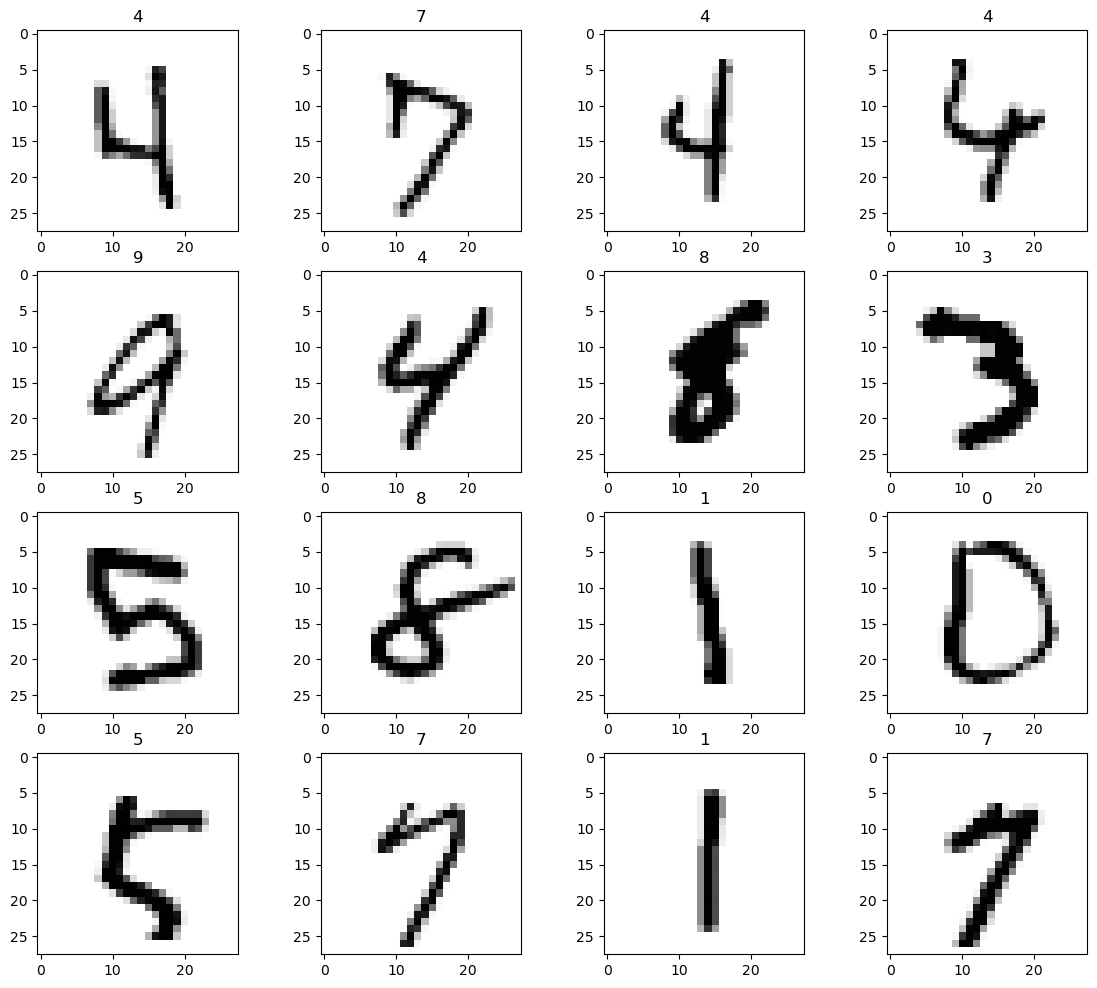

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

for idx, num in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[num].reshape(28,28), cmap='Greys')
    plt.title(y_train[num])

plt.show()

일단 fit

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9688

784개의 특성을 가지고 있는 6만개의 데이터를 학습하고 1만개의 테스트데이터를 쓰고있다
- KNN은 차원이 많아지면 비효율적이다
- 그래서 PCA로 차원을 줄여주자

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf',KNeighborsClassifier())
])

params = {
    'pca__n_components' : [2,5,10],
    'clf__n_neighbors' : [5,10,15]  
}


In [14]:
kf = StratifiedKFold(n_splits=5, shuffle=True,random_state=13)
grid_cv = GridSearchCV(pipe, param_grid=params, cv=kf, n_jobs=-1)
grid_cv.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]})

In [15]:
grid_cv.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('clf', KNeighborsClassifier(n_neighbors=10))])

In [16]:
grid_cv.best_score_

0.9310333333333334

In [17]:
grid_cv.best_params_

{'clf__n_neighbors': 10, 'pca__n_components': 10}

In [18]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,pred)

0.9284

주성분 분석 전보다 시간이 많이 줄었다.

In [19]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test,y_pred))


results(grid_cv.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.95     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.95      0.94     60000



데이터 예측해보기


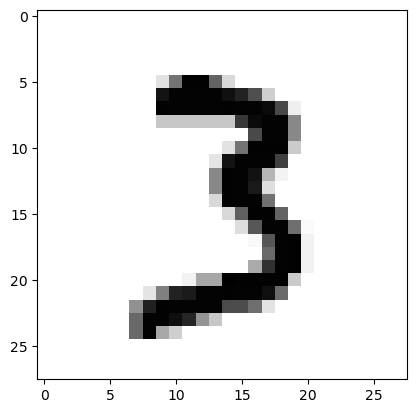

Ans: [3]
Real: 3


In [23]:
n = 811 

plt.imshow(X_test[n].reshape(28,28),cmap='Greys')
plt.show()

print('Ans:', grid_cv.best_estimator_.predict(X_test[n].reshape(1,784)))
print('Real:',y_test[n])

예측 틀린 데이터 확인해보기

In [24]:
preds = grid_cv.best_estimator_.predict(X_test)
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
wrong_results = X_test[y_test != preds]
wrong_results

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
samples = random.choices(population=range(0,wrong_results.shape[0]),k=16)

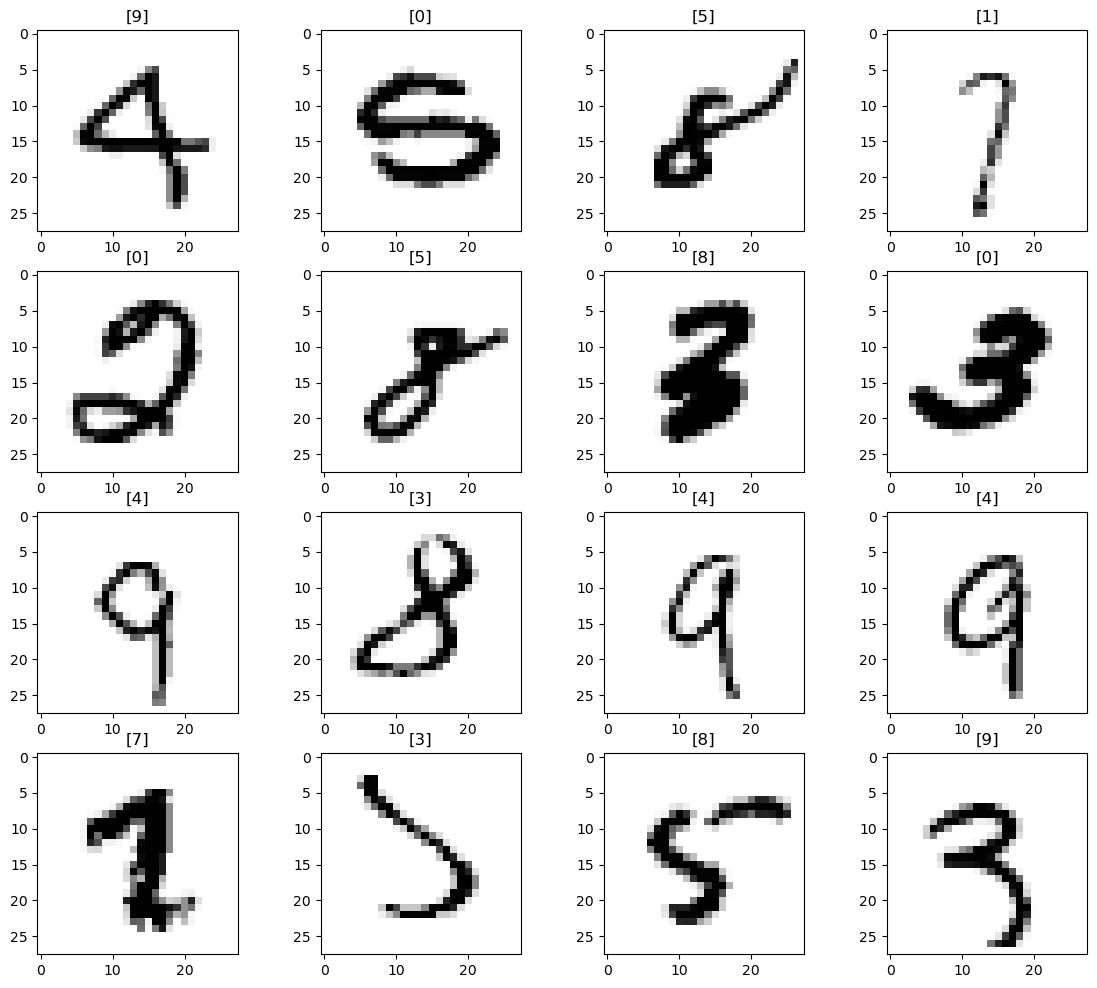

In [32]:
plt.figure(figsize=(14,12))

for idx,num in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(wrong_results[num].reshape(28,28),cmap='Greys')
    digit= grid_cv.best_estimator_.predict(wrong_results[num].reshape(1,784))

    plt.title(str(digit))

plt.show()

---

Titanic 데이터 